In [29]:
#importing libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
#importing the dataset
learning = pd.read_csv(r"C:\Users\Sangee\Downloads\upwork\Phani\learning.csv")
learning.head()

,num.responses,cost
0,16,77
1,14,70
2,22,85
3,10,50
4,14,62


In [38]:
#OlS 
Y = learning.cost
X = learning["num.responses"]
learning_ols = sm.OLS(Y,X).fit()
print(learning_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1296.
Date:                Sat, 25 Jan 2020   Prob (F-statistic):           9.13e-13
Time:                        07:35:47   Log-Likelihood:                -39.097
No. Observations:                  12   AIC:                             80.19
Df Residuals:                      11   BIC:                             80.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
num.responses     4.5197      0.126     36.005

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


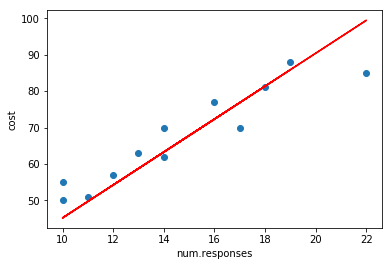

In [45]:
#cost Vs num.Response
Y_pred = learning_ols.predict(X) 
plt.scatter(X, Y)
plt.xlabel("num.responses")
plt.ylabel("cost")
plt.plot(X, Y_pred, color='red')
plt.show()


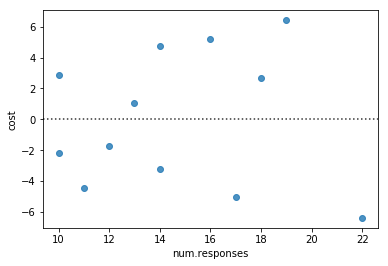

In [47]:
#residual plot
sns.residplot(X, Y)

Text(0.5,0,'Residuals')

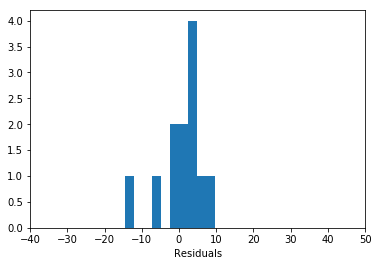

In [48]:
#Histogram of residuals
ax = plt.hist(learning_ols.resid)
plt.xlim(-40,50)
plt.xlabel('Residuals')

In [25]:
#WLS
w = 1/(learning["num.responses"]^2)
learning_wls = sm.WLS(Y,X, weights=w).fit()   
print(learning_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1296.
Date:                Sat, 25 Jan 2020   Prob (F-statistic):           9.13e-13
Time:                        07:21:44   Log-Likelihood:                -39.097
No. Observations:                  12   AIC:                             80.19
Df Residuals:                      11   BIC:                             80.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
num.responses     4.5197      0.126     36.005

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [49]:
#Comparing the results
print('R2_ols: ', learning_ols.rsquared)
print('R2_WLS: ', learning_wls.rsquared)

R2:  0.9915861646070941
R2:  0.9916229612643661
